In [4]:
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pre-processing

In [30]:
data = pd.read_csv('data/wide_chts_data.csv')
# data.with_column('age_ctgry', 0)

In [27]:
data['age_ctgry']=[0]*len(data['age'])
data['age_ctgry'] = '0-04'
data.loc[data['age']>4,'age_ctgry']='05-19'
data.loc[data['age']>19,'age_ctgry']='20-44'
data.loc[data['age']>44,'age_ctgry']='45-64'
data.loc[data['age']>64,'age_ctgry']='65+'

data.loc[data['choice']==1,'choice']='da'
data.loc[data['choice']==2,'choice']='s2'
data.loc[data['choice']==3,'choice']='s3'
data.loc[data['choice']==4,'choice']='wTrnW'
data.loc[data['choice']==5,'choice']='dTrnW'
data.loc[data['choice']==6,'choice']='wTrnD'
data.loc[data['choice']==7,'choice']='walk'
data.loc[data['choice']==8,'choice']='bike'


data



,observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,...,dtw_tt,wtd_tt,walk_tt,bike_tt,da_cost,s2_cost,s3_cost,wtw_cost,dtw_cost,wtd_cost
0,1,da,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,da,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,s2,1,1,1,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,bike,0,1,1,1,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,walk,0,1,1,1,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,s2,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,da,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,s3,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,wTrnW,1,1,1,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,walk,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.columns
data['tt'] = 0 
data['cost'] = 0 
data['distance'] = 0 

# data['da_tt'] = 0
# data['s2_tt'] = 0
# data['s3_tt'] = 0
# data['wtw_tt'] = 0
# data['dtw_tt'] = 0
# data['wtd_tt'] = 0
# data['walk_tt'] = 0
# data['bike_tt'] = 0

# data['da_cost'] = 0
# data['s2_cost'] = 0
# data['s3_cost'] = 0
# data['wtw_cost'] = 0
# data['dtw_cost'] = 0
# data['wtd_cost'] = 0
# data['walk_cost'] = 0 
# data['bike_cost'] = 0


# df.loc[df['x'] < -2, 'y'] = 1
data.loc[data['choice']=='da','tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']=='s2','tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']=='s3','tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']=='wtrnw','tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']=='dtrnw','tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']=='wtrnd','tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']=='walk','tt'] = data['total_travel_time_walk']
data.loc[data['choice']=='bike','tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']=='da','cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']=='s2','cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']=='s3','cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']=='wtrnw','cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']=='dtrnw','cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']=='wtrnd','cost'] = data['total_travel_cost_walk_transit_drive']

data.loc[data['choice']=='da','distance'] = data['total_travel_distance_drive_alone']
data.loc[data['choice']=='s2','distance'] = data['total_travel_distance_shared_ride_2']
data.loc[data['choice']=='s3','distance'] = data['total_travel_distance_shared_ride_3+']
data.loc[data['choice']=='walk','distance'] = data['total_travel_distance_walk']
data.loc[data['choice']=='bike','distance'] = data['total_travel_distance_bicycle']


data.loc[data['choice']==1,'da_tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']==2,'s2_tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']==3,'s3_tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']==4,'wtw_tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']==5,'dtw_tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']==6,'wtd_tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']==7,'walk_tt'] = data['total_travel_time_walk']
data.loc[data['choice']==8,'bike_tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']==1,'da_cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']==2,'s2_cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']==3,'s3_cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']==4,'wtw_cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']==5,'dtw_cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']==6,'wtd_cost'] = data['total_travel_cost_walk_transit_drive']

In [20]:
# data['total_travel_time_drive_alone']
# data[['tt','cost']]

data.to_csv('data/modechoice2.csv', index=False)

# mode choice plots

In [21]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mc = Table.read_table('data/modechoice2.csv')
mc

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry,tt,cost,distance,da_tt,s2_tt,s3_tt,wtw_tt,dtw_tt,wtd_tt,walk_tt,bike_tt,da_cost,s2_cost,s3_cost,wtw_cost,dtw_cost,wtd_cost
1,da,1,1,1,1,1,1,1,1,1043613,1,0,1004,969,53,2,6,87500,0,-1,0,20.97,20.97,20.97,83.56,63.05,67.29,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,45-64,20.97,1.6817,9.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,da,1,1,1,1,1,1,1,1,1043613,1,1,1004,969,53,2,6,87500,0,-1,0,22.16,22.16,22.16,87.38,77.79,58.01,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,45-64,22.16,1.6817,9.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,s2,1,1,1,1,1,1,0,0,1045607,1,0,908,116,57,1,4,42500,0,-1,1,47.98,47.98,47.98,140.63,131.49,137.39,nan,nan,31.94,31.94,31.94,nan,nan,9.1125,5.2071,3.645,6.95,7.75,5.98,45-64,47.98,5.2071,31.94,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,bike,0,1,1,1,0,1,1,1,1049908,1,0,30,12,50,1,2,17500,0,-1,0,nan,15.05,15.05,26.46,nan,16.77,42.8,10.7,nan,2.23,2.23,2.14,2.14,nan,0.2355,0.1649,3.22,nan,3.22,45-64,10.7,0,2.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,walk,0,1,1,1,0,1,1,1,1049908,1,1,30,9,50,1,2,17500,0,-1,0,nan,11.72,11.72,43.86,nan,28.89,19.2,4.8,nan,0.96,0.96,0.96,0.96,nan,0.1014,0.071,3.22,nan,3.22,45-64,19.2,0,0.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,s2,1,1,1,1,1,1,1,1,1051388,2,0,89,4,48,3,7,125000,0,-1,0,26.32,26.32,26.32,42.1,55.48,58.48,143.2,35.8,7.4,7.4,7.4,7.16,7.16,1.3675,0.7815,0.547,3.22,3.98,3.22,45-64,26.32,0.7815,7.4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,da,1,1,1,1,1,1,1,1,1051388,2,1,89,23,48,3,7,125000,0,-1,0,32.07,32.07,32.07,86.89,91.7,83.35,184.8,46.2,9.47,9.47,9.47,9.24,9.24,1.7501,1,0.7,3.22,3.22,3.22,45-64,32.07,1.7501,9.47,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,s3,1,1,1,1,1,1,1,1,1051388,3,0,89,71,10,3,7,125000,0,-1,0,16.58,16.58,16.58,53.32,46.76,46.77,94,23.5,4.7,4.7,4.7,4.7,4.7,0.8686,0.4964,0.3474,3.22,3.22,3.22,05-19,16.58,0.3474,4.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,wTrnW,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,45-64,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,walk,1,1,1,1,1,1,1,1,1093539,1,0,90,111,56,3,8,175000,1,999998,0,33.13,33.13,33.13,100.65,100.39,100.39,192.4,48.1,9.86,9.86,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,45-64,192.4,0,9.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## x-axis below is messed up

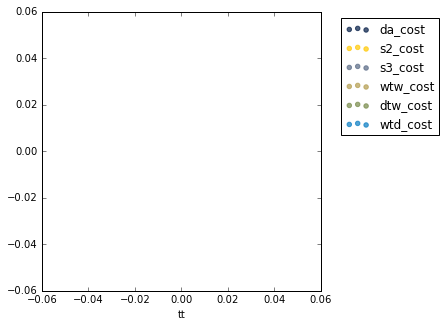

In [28]:
%matplotlib inline
# mc.select(['tt','cost']).scatter('tt')
mc.select(['da_cost', 's2_cost', 's3_cost','wtw_cost','dtw_cost', 
           'dtw_cost','wtd_cost','tt']).scatter('tt')


## Using matplotlib scatter instead

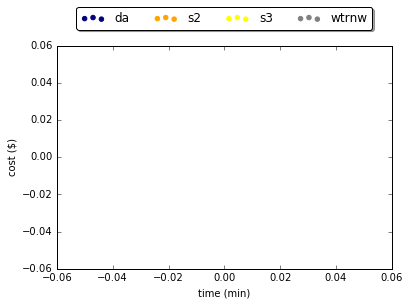

In [29]:
plt.scatter(mc.where('choice',1).column('tt'), mc.where('choice',1).column('cost'), color='navy', label ='da')
plt.scatter(mc.where('choice',2).column('tt'), mc.where('choice',2).column('cost'), color='orange', label= 's2')
plt.scatter(mc.where('choice',3).column('tt'), mc.where('choice',3).column('cost'), color='yellow', label='s3')
plt.scatter(mc.where('choice',4).column('tt'), mc.where('choice',4).column('cost'), color='grey', label = 'wtrnw')
plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.ylabel('cost ($)')
plt.xlabel('time (min)')


## Travel time vs. distance for bike and walk

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


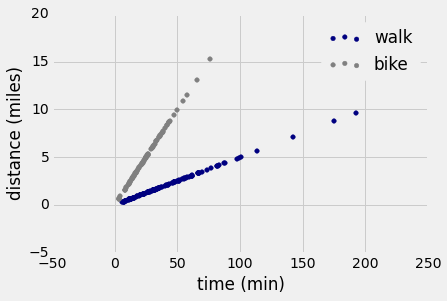

In [18]:
# mc.where('choice',8)

plt.scatter(mc.where('choice',7).column('tt'),
            mc.where('choice',7).column('total_travel_distance_walk'), 
            color='navy', label = 'walk')

plt.scatter(mc.where('choice',8).column('tt'),
            mc.where('choice',8).column('total_travel_distance_bicycle'), 
            color='grey', label = 'bike')

plt.legend()
plt.xlabel('time (min)')
plt.ylabel('distance (miles)')

## Comparing walk trip times by age

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


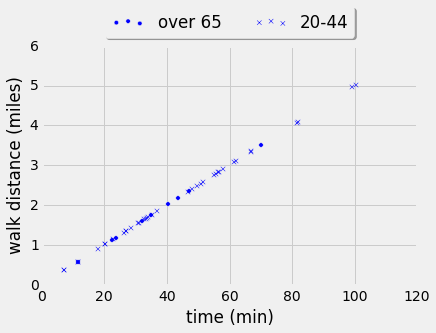

In [21]:
plt.scatter(mc.where('choice',7).where('age_ctgry',4).column('tt'),
            mc.where('choice',7).where('age_ctgry',4).column('total_travel_distance_walk'), 
            label = 'over 65')
plt.scatter(mc.where('choice',7).where('age_ctgry',2).column('tt'),
            mc.where('choice',7).where('age_ctgry',2).column('total_travel_distance_walk'),
            marker='x', label = '20-44')

plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.ylabel('walk distance (miles)')
plt.xlabel('time (min)')

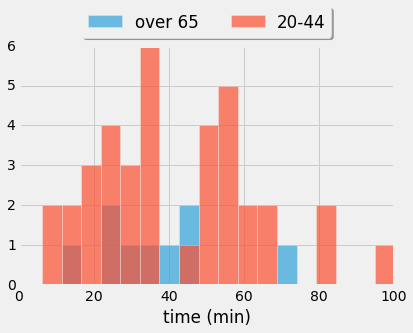

In [84]:
bins = np.linspace(1,100,20)

plt.hist(mc.where('choice',7).where('age_ctgry',4).column('tt'), alpha = .7, 
         bins=bins,label = 'over 65')
# plt.hist(mc.where('choice',7).where('age_ctgry',3).column('tt'), alpha = .7, 
#          bins=bins,label = '45-65')
plt.hist(mc.where('choice',7).where('age_ctgry',2).column('tt'), alpha = .7, 
         bins=bins, label = '20-44')
# plt.hist(mc.where('choice',7).where('age_ctgry',1).column('tt'), alpha = .7, 
#          bins=bins, label = '5-19')

plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.xlabel('time (min)')

# plt.hist(mc.where('choice',8).where('age_ctgry',4).column('tt'), alpha = .8, bins=bins)
# plt.hist(mc.where('choice',8).where('age_ctgry',2).column('tt'), alpha = .8, bins=bins)


## Comparing bike trips by age

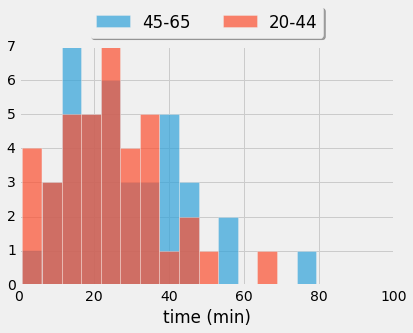

In [56]:
bins = np.linspace(1,100,20)

plt.hist(mc.where('choice',8).where('age_ctgry',3).column('tt'), alpha = .7, 
         bins=bins,label = '45-65')
plt.hist(mc.where('choice',8).where('age_ctgry',2).column('tt'), alpha = .7, 
         bins=bins, label = '20-44')
# plt.hist(mc.where('choice',7).where('age_ctgry',1).column('tt'), alpha = .7, 
#          bins=bins, label = '5-19')

plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.xlabel('time (min)')

# plt.hist(mc.where('choice',8).where('age_ctgry',4).column('tt'), alpha = .8, bins=bins)
# plt.hist(mc.where('choice',8).where('age_ctgry',2).column('tt'), alpha = .8, bins=bins)


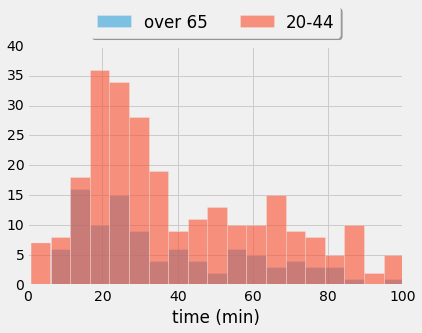

In [25]:
bins = np.linspace(1,100,20)
plt.hist(mc.where('age_ctgry',4).column('tt'), alpha = .6, 
         bins=bins,label = 'over 65')
plt.hist(mc.where('age_ctgry',2).column('tt'), alpha = .6, 
         bins=bins, label = '20-44')

plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.xlabel('time (min)')

# plt.hist(mc.where('choice',8).where('age_ctgry',4).column('tt'), alpha = .8, bins=bins)
# plt.hist(mc.where('choice',8).where('age_ctgry',2).column('tt'), alpha = .8, bins=bins)


In [12]:
mc.where('choice',4)

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry,tt,cost,distance,da_tt,s2_tt,s3_tt,wtw_tt,dtw_tt,wtd_tt,walk_tt,bike_tt,da_cost,s2_cost,s3_cost,wtw_cost,dtw_cost,wtd_cost,walk_cost,bike_cost
9,4,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,3,54.13,3.22,0,0,0,0,54.13,0,0,0,0,0,0,0,3.22,0,0,0,0
15,4,1,1,1,1,1,1,1,1,1119137,1,0,168,133,71,2,6,87500,0,-1,0,13.87,13.87,13.87,50.26,39.46,38.7,78.4,19.6,3.92,3.92,3.92,3.92,3.92,0.7244,0.414,0.2898,3.22,3.22,3.22,4,50.26,3.22,0,0,0,0,50.26,0,0,0,0,0,0,0,3.22,0,0,0,0
16,4,1,1,1,1,1,1,1,1,1119137,2,0,168,133,58,2,6,87500,0,-1,0,13.87,13.87,13.87,50.26,39.46,38.7,78.4,19.6,3.92,3.92,3.92,3.92,3.92,0.7244,0.414,0.2898,3.22,3.22,3.22,3,50.26,3.22,0,0,0,0,50.26,0,0,0,0,0,0,0,3.22,0,0,0,0
17,4,1,1,1,1,1,1,1,0,1119607,1,0,139,9,31,1,6,87500,1,62,0,22.39,22.39,22.39,66.25,58.76,53.41,144.4,nan,7.9,7.9,7.9,7.22,nan,1.4599,0.8343,0.584,3.22,3.22,3.22,2,66.25,3.22,0,0,0,0,66.25,0,0,0,0,0,0,0,3.22,0,0,0,0
18,4,1,1,1,1,1,1,1,0,1120220,2,0,111,1,29,2,8,175000,1,40,0,21.11,21.11,21.11,64.2,57.15,63.48,110.6,nan,5.65,5.65,5.65,5.53,nan,1.0441,0.5966,0.4176,3.22,3.22,3.22,2,64.2,3.22,0,0,0,0,64.2,0,0,0,0,0,0,0,3.22,0,0,0,0
19,4,1,1,1,1,1,1,1,1,1121261,3,0,164,93,13,4,6,87500,0,-1,0,24.02,24.02,24.02,161,99.41,149.26,173.6,43.4,9.99,9.99,9.99,8.68,8.68,1.8462,1.0549,0.7385,3.22,3.22,5.55,1,161,3.22,0,0,0,0,161,0,0,0,0,0,0,0,3.22,0,0,0,0
20,4,1,1,1,1,1,1,1,1,1121261,4,0,164,93,11,4,6,87500,0,-1,0,24.02,24.02,24.02,161,99.41,149.26,173.6,43.4,9.99,9.99,9.99,8.68,8.68,1.8462,1.0549,0.7385,3.22,3.22,5.55,1,161,3.22,0,0,0,0,161,0,0,0,0,0,0,0,3.22,0,0,0,0
23,4,0,1,1,1,0,1,1,1,1128764,1,0,87,117,51,3,5,62500,0,-1,0,nan,24.32,24.32,77.64,nan,75.62,127,31.75,nan,6.58,6.58,6.35,6.35,nan,0.6948,0.4864,4.63,nan,3.22,3,77.64,4.63,0,0,0,0,77.64,0,0,0,0,0,0,0,4.63,0,0,0,0
24,4,0,1,1,1,0,1,1,1,1128764,2,0,87,117,50,3,5,62500,0,-1,0,nan,24.32,24.32,77.64,nan,75.62,127,31.75,nan,6.58,6.58,6.35,6.35,nan,0.6948,0.4864,4.63,nan,3.22,3,77.64,4.63,0,0,0,0,77.64,0,0,0,0,0,0,0,4.63,0,0,0,0
27,4,1,1,1,1,1,1,0,0,1129102,2,0,156,1019,18,4,2,17500,1,999998,1,54.66,54.66,54.66,177.03,159.72,165.79,nan,nan,33.85,33.85,33.8,nan,nan,11.0755,6.3289,3.3025,11.62,8.92,9.32,1,177.03,11.62,0,0,0,0,177.03,0,0,0,0,0,0,0,11.62,0,0,0,0


## Plot mode not chosen of da and walk to transit with '+' marker

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


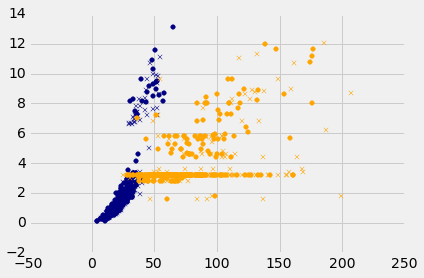

In [87]:
plt.scatter(mc.where('choice',1).column('tt'), mc.where('choice',1).column('cost'), color='navy')
plt.scatter(mc.where('choice',4).column('total_travel_time_drive_alone'), 
            mc.where('choice',4).column('total_travel_cost_drive_alone'), color='navy', marker = 'x')
plt.scatter(mc.where('choice',4).column('tt'), mc.where('choice',4).column('cost'), color='orange')
plt.scatter(mc.where('choice',1).column('total_travel_time_walk_transit_walk'), 
            mc.where('choice',1).column('total_travel_cost_walk_transit_walk'), color='orange', marker = 'x')



In [88]:
took_transit = mc.where('choice',4)
took_transit_da_avail = took_transit.where('availability_drive_alone',1)
chose_wtw_tt_delta = took_transit_da_avail.column('tt')-took_transit_da_avail.column('total_travel_time_drive_alone')

chose_wtw_cost_delta = took_transit_da_avail.column('cost')-took_transit_da_avail.column('total_travel_cost_drive_alone')
chose_wtw_tt_delta

# took_transit_da_avail.column('cost')-took_transit_da_avail.column('total_travel_cost_drive_alone')

array([  32.2 ,   36.39,   36.39,   43.86,   43.09,  136.98,  136.98,
        122.37,   25.81,   21.79,   42.69,   26.95,  100.39,   42.85,
         64.66,   38.99,   88.5 ,   49.65,   44.19,   35.69,   78.54,
         28.84,   34.91,   89.36,   39.99,   40.4 ,   54.88,   79.98,
         45.14,   24.22,   37.31,   46.85,   87.74,   45.34,   48.48,
         37.31,  119.96,   68.81,   51.77,   64.98,   51.61,   82.38,
         51.95,   32.99,   51.03,   67.12,   33.16,   38.01,   47.88,
         32.79,   36.2 ,   82.09,   31.57,   54.57,   42.03,   16.62,
         49.32,   86.2 ,   16.14,   33.78,   46.79,   12.14,   36.84,
         24.56,   59.04,   35.54,   67.64,   67.72,   84.53,   32.32,
         29.95,   40.86,   47.44,   69.6 ,   39.73,   32.63,   21.05,
         27.35,   46.61,   30.37,   42.02,   60.24,   35.15,   52.66,
         40.92,   47.59,   55.69,   44.35,   32.99,   53.  ,   74.44,
         20.38,   21.99,   63.8 ,   33.21,   29.46,   39.11,   29.54,
         25.93,   36

TypeError: There is no line property "kind"

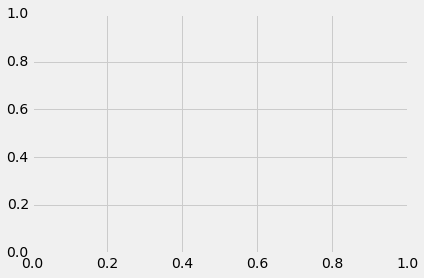

In [99]:
bins = np.linspace(0,160,16)
drove = mc.where('choice',1)
drove_wtw_avail = drove.where('availability_walk_transit_walk',1)

chose_drive_tt_delta = drove_wtw_avail.column('total_travel_time_walk_transit_walk')-drove_wtw_avail.column('tt')
chose_drive_cost_delta = drove_wtw_avail.column('total_travel_cost_walk_transit_walk')-drove_wtw_avail.column('cost')


# plt.hist(chose_drive_tt_delta, alpha=.7, bins=bins, label='drove')
# plt.hist(chose_wtw_tt_delta, alpha=.7, bins=bins, label = 'took transit')

plt.plot(chose_drive_tt_delta, kind='kde', alpha=.7, label='drove')
plt.plot(chose_wtw_tt_delta, kind='kde', alpha=.7, label = 'took transit')



plt.legend()
plt.xlabel('delta travel time (min)')

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


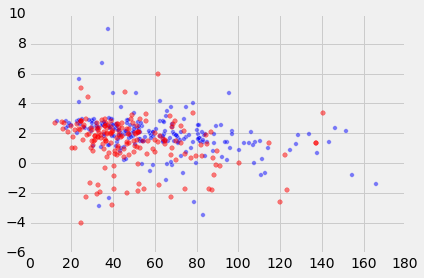

In [97]:
plt.scatter(chose_drive_tt_delta, chose_drive_cost_delta, alpha=.5)
plt.scatter(chose_wtw_tt_delta, chose_wtw_cost_delta, color='red', alpha=.5)

plt

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


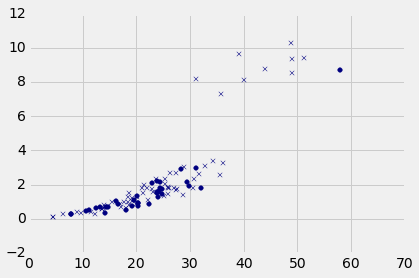

In [14]:
plt.scatter(mc.where('choice',1).where('age_ctgry',4).column('tt'), 
            mc.where('choice',1).where('age_ctgry',4).column('cost'), color='navy')
plt.scatter(mc.where('choice',1).where('age_ctgry',2).column('tt'), 
            mc.where('choice',1).where('age_ctgry',2).column('cost'), color='navy', marker='x')

## Mode split by age

In [59]:
mc.pivot('age_ctgry','choice')

choice,0,1,2,3,4
1,0,0,68,149,35
2,11,45,32,36,7
3,14,76,7,9,11
4,6,37,82,112,37
5,0,2,3,6,0
6,0,1,4,4,0
7,6,41,38,40,9
8,2,5,38,39,3


In [1]:
mc.pivot_hist('age_ctgry','choice')

NameError: name 'mc' is not defined